<h4 style="color: #00698f; font-weight: bold; text-align: center;"> <span style="color: #8b9467;">Integrating</span> <span style="color: #ff9900;">Microsoft SQL Server</span> <span style="color: #3498db;">and MySQL</span>: <span style="color: #8e44ad;">A Data Visualization Dashboard</span> <span style="color: #2ecc71;">for Student Performance Analysis</span> </h4>

### Establish a connection to the Microsoft SQL Server

In [133]:
import pypyodbc as odbc
DRIVER_NAME= 'SQL SERVER'
SERVER_NAME='LAPTOP-GI8UHGPH\SQLEXPRESS'
DATABASE_NAME = 'SQL BIGINING'

connection_string = f"""
DRIVER={{{DRIVER_NAME}}};
SERVER={SERVER_NAME};
DATABASE={DATABASE_NAME};
Trust_Connectio = yes;
"""

conn =odbc.connect(connection_string)

# create a cursor object
cursor = conn.cursor()

# define a select statement
select_statement = "SELECT * FROM student_marks"

# execute the select statement
cursor.execute(select_statement)

# fetch all the rows and print them out
rows = cursor.fetchall()
for row in rows:
    print(row)

# close the cursor and connection objects
cursor.close()
conn.close()

('Lokesh', 1, 22, 21, 18)
('Lokesh', 2, 21, 20, 17)
('Lokesh', 3, 14, 19, 15)
('Prasanna', 1, 20, 17, 22)
('Prasanna', 2, 23, 15, 21)
('Prasanna', 3, 22, 18, 19)
('Lakshman', 1, 23, 19, 20)
('Lakshman', 2, 24, 22, 24)
('Lakshman', 3, 12, 25, 19)
('Phani', 1, 15, 22, 25)
('Phani', 2, 18, 21, 25)
('Phani', 3, 17, 18, 20)


<>:3: SyntaxWarning:

invalid escape sequence '\S'

<>:3: SyntaxWarning:

invalid escape sequence '\S'

C:\Users\lokesh\AppData\Local\Temp\ipykernel_3940\4254083272.py:3: SyntaxWarning:

invalid escape sequence '\S'



### The student_marks table is converted to a data frame

In [134]:
import pandas as pd
df1 = pd.DataFrame(rows, columns=['name',  'ut', 'datascience',  'statistics',  'computers'])
df1

,name,ut,datascience,statistics,computers
0,Lokesh,1,22,21,18
1,Lokesh,2,21,20,17
2,Lokesh,3,14,19,15
3,Prasanna,1,20,17,22
4,Prasanna,2,23,15,21
5,Prasanna,3,22,18,19
6,Lakshman,1,23,19,20
7,Lakshman,2,24,22,24
8,Lakshman,3,12,25,19
9,Phani,1,15,22,25


### Counting Non-Null Values in Each Row (axis=1)

In [135]:
df1.count(axis=1)

0     5
1     5
2     5
3     5
4     5
5     5
6     5
7     5
8     5
9     5
10    5
11    5
dtype: int64

### Maximum Values in Each Column (axis=0)

In [136]:
print(df1.max())

name           Prasanna
ut                    3
datascience          24
statistics           25
computers            25
dtype: object


### Printing Maximum Values in Numeric Columns

In [137]:
print(df1.max(numeric_only=True))

ut              3
datascience    24
statistics     25
computers      25
dtype: int64


### Calculating the Total of Each Row

In [138]:
df1['total'] = df1.iloc[:, 2:].sum(axis=1)
df1

,name,ut,datascience,statistics,computers,total
0,Lokesh,1,22,21,18,61
1,Lokesh,2,21,20,17,58
2,Lokesh,3,14,19,15,48
3,Prasanna,1,20,17,22,59
4,Prasanna,2,23,15,21,59
5,Prasanna,3,22,18,19,59
6,Lakshman,1,23,19,20,62
7,Lakshman,2,24,22,24,70
8,Lakshman,3,12,25,19,56
9,Phani,1,15,22,25,62


### Result of Unit Test 1:

In [139]:
UT1 = df1[df1['ut'] == 1]
print('\nResult of Unit Test 1: \n\n',UT1)


Result of Unit Test 1: 

        name  ut  datascience  statistics  computers  total
0    Lokesh   1           22          21         18     61
3  Prasanna   1           20          17         22     59
6  Lakshman   1           23          19         20     62
9     Phani   1           15          22         25     62


### Result of Unit Test 2:

In [140]:
UT2 = df1[df1['ut'] == 2]
print('\nResult of Unit Test 2: \n\n',UT2)


Result of Unit Test 2: 

         name  ut  datascience  statistics  computers  total
1     Lokesh   2           21          20         17     58
4   Prasanna   2           23          15         21     59
7   Lakshman   2           24          22         24     70
10     Phani   2           18          21         25     64


### Result of Unit Test 3:

In [141]:
UT3 = df1[df1['ut'] == 3]
print('\nResult of Unit Test 3: \n\n',UT3)


Result of Unit Test 3: 

         name  ut  datascience  statistics  computers  total
2     Lokesh   3           14          19         15     48
5   Prasanna   3           22          18         19     59
8   Lakshman   3           12          25         19     56
11     Phani   3           17          18         20     55


### Highest Marks for all students

In [142]:
highest = df1['total'].max()
print(df1[df1['total'] == highest])

       name  ut  datascience  statistics  computers  total
7  Lakshman   2           24          22         24     70


### Highest Marks for all students in the unit test 1:

In [143]:
highest = UT1['total'].max()
print(UT1[UT1['total']== highest])

       name  ut  datascience  statistics  computers  total
6  Lakshman   1           23          19         20     62
9     Phani   1           15          22         25     62


### Find the Highest and Second-Highest Scores in Unit Test 1:

In [144]:
# find the highest value in 'total' column
highest1 = UT1['total'].nlargest(1).iloc[0]
# find the second highest value in 'total' column
highest2 = UT1[UT1['total'] != highest1]['total'].nlargest(1).iloc[0]
# print the rows where 'total' is equal to second highest value
print(UT1[UT1['total'].isin([highest1,highest2])].sort_values(by='total', ascending=False))

       name  ut  datascience  statistics  computers  total
6  Lakshman   1           23          19         20     62
9     Phani   1           15          22         25     62
0    Lokesh   1           22          21         18     61


### Find the Highest and Second-Highest Scores in Unit Test 2:

In [145]:
highest1_ut2 = UT2['total'].nlargest(1).iloc[0]
highest2_ut2 = UT2[UT2['total'] != highest1_ut2]['total'].nlargest(1).iloc[0]
print(UT2[UT2['total'].isin([highest1_ut2,highest2_ut2])].sort_values(by='total', ascending=False))

        name  ut  datascience  statistics  computers  total
7   Lakshman   2           24          22         24     70
10     Phani   2           18          21         25     64


### Find the Highest and Second-Highest Scores in Unit Test 3:

In [146]:
highest1_ut3 = UT3['total'].nlargest(1).iloc[0]
highest2_ut3 = UT3[UT3['total'] != highest1_ut3]['total'].nlargest(1).iloc[0]
print(UT3[UT3['total'].isin([highest1_ut3,highest2_ut3])].sort_values(by='total', ascending=False))

       name  ut  datascience  statistics  computers  total
5  Prasanna   3           22          18         19     59
8  Lakshman   3           12          25         19     56


### Find the Minimum Marks Obtained by Phani in Each Subject Across Unit Tests:


In [147]:
dfphani = df1.loc[df1.name == 'Phani']
print('Minimum Marks obtained by Phani in each subject across the unit tests\n\n', dfphani[['datascience','statistics','computers']].min())

Minimum Marks obtained by Phani in each subject across the unit tests

 datascience    15
statistics     18
computers      20
dtype: int64


### Find the Minimum Marks Obtained by Lakshman in Each Subject Across Unit Tests:

In [148]:
dflakshman = df1.loc[df1.name == 'Lakshman']
print('Minimum Marks obtained by Lakshman in each subject across the unit tests\n\n', dflakshman[['datascience','statistics','computers']].min())

Minimum Marks obtained by Lakshman in each subject across the unit tests

 datascience    12
statistics     19
computers      19
dtype: int64


### Find the Minimum Marks Obtained by Prasanna in Each Subject Across Unit Tests:

In [149]:
dfprasanna = df1.loc[df1.name == 'Prasanna']
print('Minimum Marks obtained by Lakshman in each subject across the unit tests\n\n', dfprasanna[['datascience','statistics','computers']].min())

Minimum Marks obtained by Lakshman in each subject across the unit tests

 datascience    20
statistics     15
computers      19
dtype: int64


### Find the Minimum Marks Obtained by Lokesh in Each Subject Across Unit Tests:

In [150]:
dflokesh = df1.loc[df1.name == 'Lokesh']
print('Minimum Marks obtained by Lokesh in each subject across the unit tests\n\n', dflokesh[['datascience','statistics','computers']].min())

Minimum Marks obtained by Lokesh in each subject across the unit tests

 datascience    14
statistics     19
computers      15
dtype: int64


### Establish a connection to the MySQL Database

In [151]:
from pymysql import *
from sqlalchemy import *
user ='root'
password = ''
host = 'localhost'
port = 3306
database = 'lokesh'
data = "mysql+pymysql://{0}:{1}@{2}:{3}/{4}".format(user,password,host,port,database)

### Retrieve and Display Student Marks from MySQL Database using Pandas:

In [152]:
df2=pd.read_sql_query('select * from student_marks',data)
df2

,Name,UT,DataScience,Statistics,Computers
0,Lokesh,1,22,21,18
1,Lokesh,2,21,20,17
2,Lokesh,3,14,19,15
3,Prasanna,1,20,17,22
4,Prasanna,2,23,15,21
5,Prasanna,3,22,18,19
6,Lakshman,1,23,19,20
7,Lakshman,2,24,22,24
8,Lakshman,3,12,25,19
9,Phani,1,15,22,25


### Calculate the Total Marks of Each Student from the Retrieved Data

In [153]:
df2['total'] = df2.iloc[:, 2:].sum(axis=1)
df2

,Name,UT,DataScience,Statistics,Computers,total
0,Lokesh,1,22,21,18,61
1,Lokesh,2,21,20,17,58
2,Lokesh,3,14,19,15,48
3,Prasanna,1,20,17,22,59
4,Prasanna,2,23,15,21,59
5,Prasanna,3,22,18,19,59
6,Lakshman,1,23,19,20,62
7,Lakshman,2,24,22,24,70
8,Lakshman,3,12,25,19,56
9,Phani,1,15,22,25,62


### Visualizing Student Performance in Data Science, Statistics, and Computers
    This code snippet uses the pandas library to load and manipulate data, and the matplotlib library to create a bar chart that displays the mean total marks of each student in three subjects: Data Science, Statistics, and Computers. The chart shows the mean marks for each student, with bars representing each subject, and provides a clear visualization of the performance of each student across the three subjects.

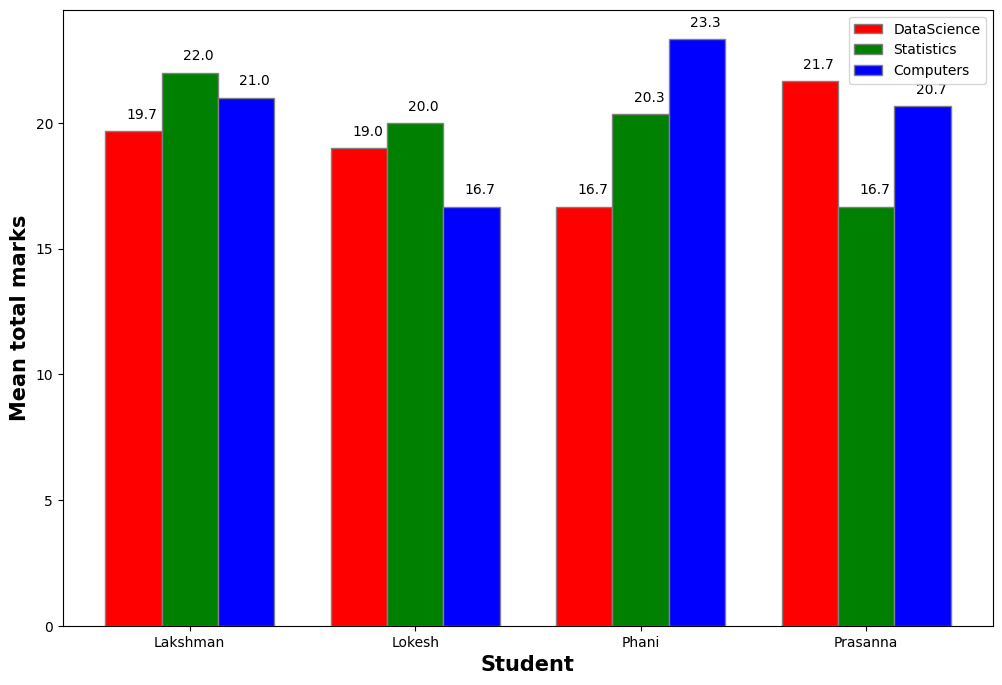

In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
data = df2
# Calculate the total marks for each student
data['total'] = data['DataScience'] + data['Statistics'] + data['Computers']

# Group the data by subject and UT, and calculate the mean total marks for each group
data_melted = pd.melt(data, id_vars=['Name', 'UT'], var_name='Subject', value_name='Marks')
grouped_data_mean = data_melted.groupby(['Name', 'Subject'])['Marks'].mean().reset_index()

# Get the number of unique students
n_students = len(grouped_data_mean['Name'].unique())

# Set width of bar
barWidth = 0.25

# Set the position of each bar on the X axis
r1 = np.arange(n_students)
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

# Make the plot
fig = plt.subplots(figsize=(12, 8))
plt.bar(r1, list(grouped_data_mean[grouped_data_mean['Subject'] == 'DataScience']['Marks']), color='r', width=barWidth, edgecolor='grey', label='DataScience')
plt.bar(r2, list(grouped_data_mean[grouped_data_mean['Subject'] == 'Statistics']['Marks']), color='g', width=barWidth, edgecolor='grey', label='Statistics')
plt.bar(r3, list(grouped_data_mean[grouped_data_mean['Subject'] == 'Computers']['Marks']), color='b', width=barWidth, edgecolor='grey', label='Computers')

# Adding labels to bars
for i in range(len(r1)):
    plt.text(x=r1[i]-0.03, y=list(grouped_data_mean[grouped_data_mean['Subject'] == 'DataScience']['Marks'])[i]+0.5, s=round(list(grouped_data_mean[grouped_data_mean['Subject'] == 'DataScience']['Marks'])[i], 1))
    plt.text(x=r2[i]-0.03, y=list(grouped_data_mean[grouped_data_mean['Subject'] == 'Statistics']['Marks'])[i]+0.5, s=round(list(grouped_data_mean[grouped_data_mean['Subject'] == 'Statistics']['Marks'])[i], 1))
    plt.text(x=r3[i]-0.03, y=list(grouped_data_mean[grouped_data_mean['Subject'] == 'Computers']['Marks'])[i]+0.5, s=round(list(grouped_data_mean[grouped_data_mean['Subject'] == 'Computers']['Marks'])[i], 1))

# Adding Xticks
plt.xlabel('Student', fontweight ='bold', fontsize = 15)
plt.ylabel('Mean total marks', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(n_students)], list(grouped_data_mean['Name'].unique()))

plt.legend()
plt.show()

### Student Marks Dashboard: Interactive Visualization of Student Performance by Name and UT

    
This code snippet uses the Dash library to create a web-based dashboard that allows users to select a student's name and UT (Unt Teste) and view their performance in three subjects: Data Science, Statistics, and Computers. The dashboard uses a stacked bar chart to visualize the student's marks in each subject, with the ability to update the graph dynamically based on user input. This provides a interactive and user-friendly way to explore student performance data.

In [155]:
import plotly.graph_objs as go
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

# Create a Dash app
app = dash.Dash(__name__)

# Define the layout of the app
app.layout = html.Div([
    html.H1('Student Marks Dashboard', style={'textAlign': 'center',  'color': 'white'}),
    html.Div([
        html.Label('Name', style={'font-weight': 'bold', 'color': 'white'}),
        html.Br(),
        dcc.Dropdown(
            id='select-name',
            options=[{'label': name, 'value': name} for name in df2['Name'].unique()],
            value='Lokesh'
        )
    ], style={'width': '98%',  'padding':'10px', 'display': 'inline-block', 'vertical-align': 'top'}),
    html.Div([
        html.Label('UT', style={'font-weight': 'bold', 'color': 'white'}),
        html.Br(),
        dcc.Dropdown(
            id='select-ut',
            options=[{'label': ut, 'value': ut} for ut in df2['UT'].unique()],
            value=1
        )
    ], style={'width': '98%',  'padding':'10px','display': 'inline-block', 'vertical-align': 'top'}),
    dcc.Graph(
        id='graph',
        style={'height': '500px'}
    )
])

# Define the callback function to update the graph based on user input
@app.callback(
    Output(component_id='graph', component_property='figure'),
    [Input(component_id='select-name', component_property='value'),
     Input(component_id='select-ut', component_property='value')])

def update_graph(selected_name, selected_ut):
    # Filter the data for the selected name and UT
    selected_data = df2[(df2['Name'] == selected_name) & (df2['UT'] == int(selected_ut))]
    
    # Create a stacked bar graph for the selected data
    trace1 = go.Bar(x=['Data Science', 'Statistics', 'Computers'], y=[selected_data['DataScience'].iloc[0], selected_data['Statistics'].iloc[0], selected_data['Computers'].iloc[0]], name='Marks', marker_color=['#1E90FF', '#FF69B4', '#32CD32'], width=0.4)
    return {'data': [trace1], 'layout': go.Layout(title='Marks for {} in UT {}'.format(selected_name, selected_ut), xaxis={'title': 'Subjects', 'automargin': True}, yaxis={'title': 'Marks'}, barmode='stack')}

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


### Student Performance Dashboard: Interactive Visualization of Mean Marks for Each Student        
This code snippet uses the Dash library to create a web-based dashboard that allows users to select a student and visualize their mean performance in three subjects: Data Science, Statistics, and Computers. The dashboard displays both the mean marks for each student and the individual marks for each student, with the ability to update the graph dynamically based on user input. This provides a interactive and user-friendly way to explore student performance data.

In [156]:
import pandas as pd
import numpy as np
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

# Load the data
data = df2
# Calculate the total marks for each student
data['total'] = data['DataScience'] + data['Statistics'] + data['Computers']

# Group the data by subject and UT, and calculate the mean total marks for each group
data_melted = pd.melt(data, id_vars=['Name', 'UT'], var_name='Subject', value_name='Marks')
grouped_data_mean = data_melted.groupby(['Name', 'UT', 'Subject'])['Marks'].mean().reset_index()

# Create a Dash app
app = dash.Dash(__name__)

# Create the layout
app.layout = html.Div([
    html.H1('Student Performance Dashboard'),
    html.Div([
        html.P('Select a student:'),
        dcc.Dropdown(
            id='student-dropdown',
            options=[{'label': name, 'value': name} for name in data['Name'].unique()]
        )
    ]),
    html.Div([
        html.H2('Student Performance'),
        dcc.Graph(id='performance-graph')
    ])
])


# Create a callback function to update the graph when the student dropdown is changed
@app.callback(
    Output('performance-graph', 'figure'),
    [Input('student-dropdown', 'value')]
)
def update_graph(selected_student):
    filtered_data = grouped_data_mean[grouped_data_mean['Name'] == selected_student]
    fig = {
        'data': [
            {'x': filtered_data['UT'], 'y': filtered_data['Marks'], 'type': 'bar', 'name': 'Mean Marks'},
            {'x': filtered_data['UT'], 'y': filtered_data['Marks'], 'type': 'line', 'name': 'Individual Marks'}
        ],
        'layout': {'title': f'Mean Marks for {selected_student}'}
    }
    return fig

# Run the app
if __name__ == '__main__':
    app.run_server(port=12345)
    